## Practical Exploration of Hebbian Learning - Part 1

Marek Grzes

University of Kent

COMP6360/8360, Teaching week 9

Last modified 01/11/2022

This exploration complements chapter 4 in O'Reilly & Munakata (2000) that introduces Hebbian learning and Principal Component analysis.

## Contents
- [Pearson Correlation Coefficient](#Pearson-Correlation-Coefficient)
- [Question 1 - Correlation](#Question-1---Correlation)
- [Question 2 - Simple Hebb Rule](#Question-2---Simple-Hebb-Rule)
- [Question 3 - Oja's Rule](#Question-3---Oja's-Rule)
- [Question 4 - Learning Rate](#Question-4---Learning-Rate)
- [References](#References)

### Pearson Correlation Coefficient

Hebbian learning finds correlational patterns. It is therefore useful to understand correlation. Note that correlation (https://en.wikipedia.org/wiki/Correlation_coefficient) is a general term, and we will focus on the Pearson correlation coefficient (PCC) (https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), which is denoted by $r$ in our notation below. The PCC measures a linear correlation between two variables $X_i$ and $X_j$. It has a value between $+1$ and $-1$. A value of $+1$ is total positive linear correlation, $0$ is no linear correlation, and $-1$ is total negative linear correlation.

In a given dataset $X$ with attributes $X_i$ and $X_k$, let $x_{ni}$ and $x_{nk}$ be the values of attributes $X_i$ and $X_k$ for a data sample $n$. Assuming the number of data samples is $N$, the corrleation coefficient $r_{ik}$ between features $X_i$ and $X_k$ is defined as:
$r_{ik}={\frac {\sum _{n=1}^{N}(x_{ni}-{\bar {x}_i})(x_{nk}-{\bar{x}_k})}{{\sqrt {\sum _{n=1}^{N}(x_{ni}-{\bar {x}_i})^{2}}}{\sqrt {\sum _{n=1}^{N}(x_{nk}-{\bar {x}_k})^{2}}}}}$
where the right-hand-side of the equation includes the average values for $X_i$ and $X_k$ (i.e. $\bar{x}_i$ and $\bar{x}_k$ respectively).

Covariance between $X_i$ and $X_k$ (i.e. $C_{ik}$) and their variances ($s^2_i$ and $s^2_k$) can be identified in the formula for $r_{ik}$. These terms are defined below. Note that $i$ and $k$ in all the equations in this section are indexes for columns (i.e. data features), and $n$ is an index for rows (i.e. data items/examples).

$\bar{x}_i = \frac{1}{N} \sum_{n=1}^{N} x_{ni}$,

$\bar{x}_k = \frac{1}{N} \sum_{n=1}^{N} x_{nk}$,

$C_{ik} = \frac{1}{N} \sum _{n=1}^{N}(x_{ni}-{\bar {x}_i})(x_{nk}-{\bar {x}_k})$,

$s^2_i = \frac{1}{N}\sum _{n=1}^{N}(x_{ni}-{\bar {x}_i})^{2}$,

$s^2_k = \frac{1}{N}\sum _{n=1}^{N}(x_{nk}-{\bar {x}_k})^{2}$.

Using the above formulas, the equation for $r_{ik}$ can be written as:
$r_{ik}=\frac{C_{ik}}{s_is_k}$.

### Question 1 - Correlation

In this question, you are given a small dataset, and your goal is to implement a procedure that will compute the correlation factor for every pair of the variables in the dataset. If this task appears fiddly to you, and it takes you more than 20 minutes to implement, you should skip it during class, and do it in your self-study time afterwards.

You are encouraged to follow the following steps while working on this question:

- **(1-1):** Inspect the data file `data_HL_simple.txt`. Check how many columns (attributes) and how many data examples (rows) it has.
- **(1-2):** Run the code that is below

In [14]:
import numpy as np
import math

# load data from the text file
data = np.loadtxt('data_HL_simple.txt', usecols=range(5))
print("original data")
print(data)

print("correlation matrix computed using numpy")
print(np.corrcoef(data.transpose()))

original data
[[ 0.  0.  1.  1. -1.]
 [-1.  0. -1. -1.  1.]
 [-1. -1. -1. -1.  1.]
 [ 1.  0.  1.  1. -1.]
 [ 0. -1.  0.  0.  0.]
 [ 1.  0.  1.  1. -1.]
 [ 0.  0.  1.  1. -1.]
 [ 0.  1.  1.  1. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0. -1.  1.  1. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0. -1. -1.  1.]
 [ 1.  1.  1.  1. -1.]
 [-1.  0.  0.  0.  0.]
 [ 0. -1. -1. -1.  1.]
 [-1. -1.  0.  0.  0.]
 [-1.  0. -1. -1.  1.]
 [ 0.  0. -1. -1.  1.]
 [ 1.  1.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [-1. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0. -1. -1.  1.]
 [ 0.  0. -1. -1.  1.]
 [ 0.  0. -1. -1.  1.]
 [ 0.  1.  0.  0.  0.]
 [-1.  0. -1. -1.  1.]
 [ 0.  1.  1.  1. -1.]
 [ 0. -1.  0.  0.  0.]
 [ 1. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  1. -1.]
 [-1.  0.  1.  1. -1.]
 [ 0.  0. -1. -1.  1.]
 [ 1.  0. -1. -1.  1.]
 [ 0.  0.  1.  1. -1.]
 [ 1.  1. -1. -1.  1.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0

- **(1-3):** Inspect the output of the above code. The correlation matrix that is printed shows the output that you will obtain using the formula for $r_{ik}$ that was presented above.
- **(1-4):** Implement the Python function that is shown in the block below. The function will take a data array $X$ as input, and will return the value of the correlation coefficient for two of its attributes (columns), $i$ and $k$.

In [3]:
def mycorr(X, i, k):
    # TODO: implement me
    n = len(X[i])
    X_Bar_I = np.mean(X[i])
    X_Bar_K = np.mean(X[k])
    sum = 0
    for index in range(n):
        sum += (X[i,index] - X_Bar_I)*(X[k,index] - X_Bar_K)
    C = sum/n
    S_I_2 = np.var(X[i])
    S_K_2 = np.var(X[k])
    return C/(math.sqrt(S_I_2*S_K_2))
    return 0

- **(1-5):** Execute your new function for all pairs of attributes (columns) of the array `data`, and put all the values in a matrix. The matrix that you obtain should be identical with the one that is computed using `np.corrcoef` above.

In [4]:
# Add your code here
rows, columns = np.shape(data)
r = np.zeros(shape=(columns, columns))
for i in range(columns):
    for k in range(columns):
        r[i,k] = mycorr(data.transpose(), i, k)
print(r)    

[[ 1.          0.24698795  0.29446685  0.29446685 -0.29446685]
 [ 0.24698795  1.          0.12996023  0.12996023 -0.12996023]
 [ 0.29446685  0.12996023  1.          1.         -1.        ]
 [ 0.29446685  0.12996023  1.          1.         -1.        ]
 [-0.29446685 -0.12996023 -1.         -1.          1.        ]]


- **(1-6):** Your initial implementation of the formula for $r_{ik}$ will likely use `for` loops if you have not used `numpy` in the past. This is totally fine, and if so, reimplement this function without explicit loops using matrix and vector operators available in `numpy`. Example operators of this kind are shown below:

In [5]:
import numpy as np

# vector subtraction
print(np.subtract([1, 2, 3], [4, 5 ,6]))

# dot product
print(np.dot([1, 2, 3], [4, 5 ,6]))

[-3 -3 -3]
32


- **(1-7):** You can skip this step if you did not use linear algebra for a long time. If you have successfully implemented all the previous steps, analyse the code that is below. This is a more "Pythonic" way of computing a correlation matrix without the use of specialised libraries. It uses the following transformation, which has a convenient, mathematical formulation in matrix notation:
    - $X$ - data matrix (rows are data examples)
    - $S=X^TX$ - scatter matrix https://en.wikipedia.org/wiki/Scatter_matrix
    - $D=\sqrt{diag(S)}$ - diagonal matrix with square roots of the diagonal elements of $S$ on its diagonal
    - $R=D^{-1}SD^{-1}$ the covariance matrix; note that this step does the division since $D^{-1}$ is an inverse of $D$

In [6]:
data_centred = data-np.average(data, axis=0)
# this will give us a numerator of the PCC formula
scatter_matrix = np.matmul(np.transpose(data_centred),data_centred)
# we will need to divide by the denominator in the PCC formula; we compute those values below
Dinv = np.linalg.inv(np.diag(np.sqrt(np.diag(scatter_matrix))))
# this multiplication does the division that we see in the PCC formula
pearson_r = np.matmul(Dinv,np.matmul(scatter_matrix,Dinv))
print(pearson_r)

[[ 1.          0.24698795  0.29446685  0.29446685 -0.29446685]
 [ 0.24698795  1.          0.12996023  0.12996023 -0.12996023]
 [ 0.29446685  0.12996023  1.          1.         -1.        ]
 [ 0.29446685  0.12996023  1.          1.         -1.        ]
 [-0.29446685 -0.12996023 -1.         -1.          1.        ]]


Another solution that you can see below can be more intuitive to read in  Python.

In [7]:
data_centered = data - np.mean(data, axis=0)
# Scatter matrix is covariance multiplied by N
scatter_matrix = np.dot(data_centered.T, data_centered)
# D is a vector of square roots of the diagonal elements of the scatter matrix. Note that the denominator in the equation for r_ik above, contains the elements of this vector.
D = np.sqrt(np.diag(scatter_matrix))
# We divide the scatter matrix by the product of the square roots of its diagonal elements.
# a[None, :] adds a new axis at the start. a[...,None] adds the new axis at the end.
pearson_r = scatter_matrix / (D[:, None] * D[None, :])
print(pearson_r)

[[ 1.          0.24698795  0.29446685  0.29446685 -0.29446685]
 [ 0.24698795  1.          0.12996023  0.12996023 -0.12996023]
 [ 0.29446685  0.12996023  1.          1.         -1.        ]
 [ 0.29446685  0.12996023  1.          1.         -1.        ]
 [-0.29446685 -0.12996023 -1.         -1.          1.        ]]


### Question 2 - Simple Hebb Rule

A small dataset with 5 features is provided in `data_HL_simple.txt`. It contains a group of correlated features, as well as additional features that are not correlated with any other feature. The full correlation matrix is computed and shown below.

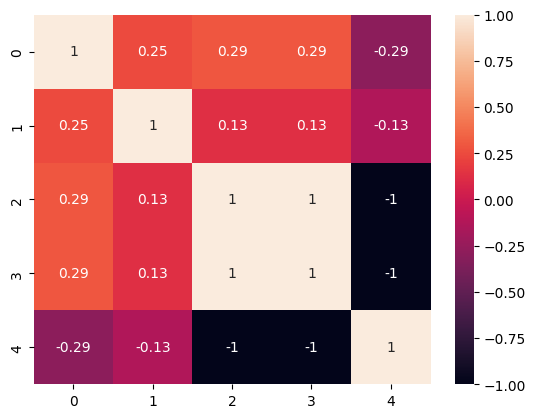

In [8]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

# load the data from the text file
data = np.loadtxt('data_HL_simple.txt', usecols=range(5))
# print("original data")
# print(data[1:5,:])

# correlation matrix in pandas and the heatmap
df = pd.DataFrame(data)
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

Your task is to implement the simple Hebbian learning rule and run it to learn the strongest correlational pattern for the dataset that is provided. A template for your implementation is bellow.

In [9]:
import numpy as np

# load data from the text file
data = np.loadtxt('data_HL_simple.txt', usecols=range(5))
print(data[1:5,:])

# we need a vector of 5 parameters
w = np.random.normal(0, 0.5, 5)

print("initial weights")
print(w)

# learning rate; don't change the learning rate epsilon when you are working on questions 2 and 3, unless you really know what you are doing. You may want to make the learning rate dependent on the epoch number to converge to a stable solution.
epsilon = 0.01

num_iterations = 6

update = 0
# we can do a fixed number of iterations because the simple Hebb rule won't converge
for i in range(num_iterations):
    for x in data:

        # TODO: add your code here; note that "epsilon"
        # is defined above and it should be used here;
        # don't change its default value in this question.

        y = np.dot(x,w)
        delta_w = epsilon*y*x

        w = w+delta_w
        
        update = update + 1
        if update % 10 == 0:
            # print every 10th update
            print("\tCurrent input: " + str(x))
            # print the weights for every x to see how they are evolving
            print("New Weights:\n" + str(w))

# the final weights
print(w)


[[-1.  0. -1. -1.  1.]
 [-1. -1. -1. -1.  1.]
 [ 1.  0.  1.  1. -1.]
 [ 0. -1.  0.  0.  0.]]
initial weights
[-0.3134406   0.51957759  0.36746936  0.83340196  0.7921544 ]
	Current input: [0. 0. 0. 0. 0.]
New Weights:
[-0.3032543   0.54111301  0.39622055  0.86215315  0.76340321]
	Current input: [-1.  0. -1. -1.  1.]
New Weights:
[-0.29662046  0.56238811  0.42156732  0.88749992  0.73805644]
	Current input: [0. 1. 0. 0. 0.]
New Weights:
[-0.29422098  0.57913853  0.44545628  0.91138889  0.71416748]
	Current input: [ 0.  0.  1.  1. -1.]
New Weights:
[-0.32045243  0.60625697  0.504366    0.97029861  0.65525776]
	Current input: [ 1.  1.  1.  1. -1.]
New Weights:
[-0.30771107  0.63123875  0.55357384  1.01950644  0.60604992]
	Current input: [0. 0. 0. 0. 0.]
New Weights:
[-0.2716539   0.66904183  0.6282284   1.094161    0.53139536]
	Current input: [-1.  0. -1. -1.  1.]
New Weights:
[-0.24528805  0.70425739  0.6925046   1.15843721  0.46711915]
	Current input: [0. 1. 0. 0. 0.]
New Weights:
[-0.238

Do the following explorations using the above code.
- **(2-1):** Open the data file `data_HL_simple.txt` in your text editor, and try to identify correlations present in these data.
- **(2-2):** Inspect the correlation matrix shown in the figure above, and identify features that have positive and negative correlation. Can you guess which correlational pattern will be learned by Hebbian learning when you run it on these data?
- **(2-3):** Implement the simple Hebb rule using the Python block above (there is very little coding required to complete the implementation).
- **(2-4):** Run your implementation of the Hebb rule on `data_HL_simple.txt`, and inspect the weights $w$ after every step of the algorithm. Identify the correlational pattern that the algorithm discovers. Are there any positively or negatively correlated features in these data according to the pattern seen in $w$?
- **(2-5):** After investigating the weights $w$, run the algorithm for a few hundred iterations (see the variable $i$ in the code) and investigate what happens to the weights. Do you see any connections with the material presented in lectures?

### Question 3 - Oja's Rule

In this section, we will use a different dataset that is in `data_two_groups.txt`. It contains five features, and its correlation matrix is shown below.

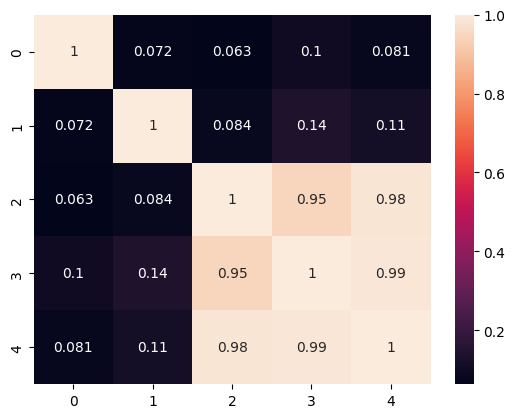

In [10]:
# load the new dataset
data = np.loadtxt('data_two_groups.txt', usecols=range(5))

# correlation matrix in pandas and the heatmap
df = pd.DataFrame(data)
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

The last three features are strongly correlated in this dataset, whereas the first two features are not correlated with any features. A 3D view of the data is shown below.

<figure>
<img src="two_groups_in3D_f2_3_4.png" alt="3D figure" class="bg-primary mb-1" width="600px">
<figcaption align = "center"><b>Fig. 1:</b> A 3D visualisation of <code>data_two_groups.txt</code> when only the last three features are used. Note that the first two features are uncorrelated with the other features.</figcaption>
</figure>

In this question, you will implement Oja's rule to find a one-dimensional representation of these data, i.e., you will reduce the dimensionality of the data from five dimensions to one dimension. You are encouraged to follow these steps:

- **(3-1):** Analyse the correlation matrix that is presented above. Can you see which features are strongly correlated? What can you say about the group of correlated features? Do we need all the features in the group to represent most of the information that they encode?
- **(3-2):** Now include Fig. 1 in your analysis. Inspect this figure, and try to find the `most important direction`, i.e., the direction that carries the largest amount of variance.
- **(3-3):** Read the Python block below, run it, and then analyse the image that is produced. The image represents the original data after compressing it to one dimension using the standard implementation of PCA in `sklearn`. Contrast this figure with Fig. 1 above. How is the horizontal axis in the 1D visualisation related to the 3D plot in Fig. 1? There is a clear relationship, and you should be able to identify it.

original data
[[ 1.15970113e-02  7.04409380e-01  2.52592430e+00  2.52592430e+00
   4.81181618e+00]
 [-2.07523136e-01 -3.67737727e-01  1.22059844e+00  5.50488774e-01
   1.88427215e+00]
 [-1.57125555e+00  1.32390861e+00 -1.47812951e+00 -1.43172722e+00
  -3.19127369e+00]
 [-8.22905621e-01  2.27103446e+00 -2.12484964e+00 -2.12484964e+00
  -4.13049738e+00]
 [ 9.70277635e-01  9.13368651e-01 -3.52387133e+00 -3.22573866e+00
  -6.63143683e+00]
 [-1.99767860e+00 -2.78435880e+00 -1.43481397e+00 -1.43481397e+00
  -2.83144180e+00]
 [ 1.86053078e-01  1.14523511e+00  1.83644938e+00  1.83644938e+00
   3.69732649e+00]
 [ 2.46378663e+00  4.58459335e-01  2.44081247e+00  2.44081247e+00
   4.85786203e+00]
 [ 7.82371225e-01  1.04699156e+00 -1.50115280e+00 -1.50115280e+00
  -3.12595173e+00]
 [-1.42258423e-01  9.20445234e-01 -1.62046158e+00 -1.62046158e+00
  -3.44263005e+00]
 [-1.49476376e+00  1.21434406e+00 -1.27598364e+00 -1.72432930e+00
  -2.69602366e+00]
 [-2.14380466e-02 -2.24415235e-03  3.22637550e+00  

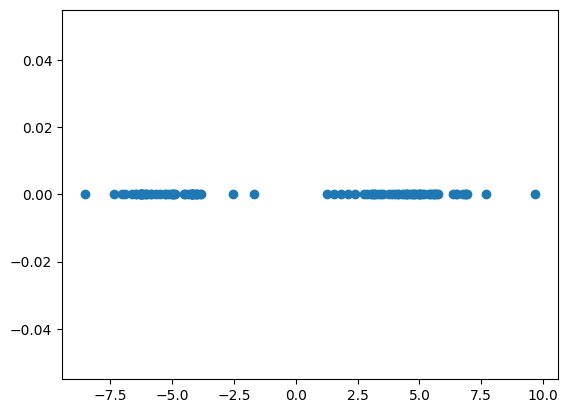

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# load data from the text file
data = np.loadtxt('data_two_groups.txt', usecols=range(5))
print("original data")
print(data)

# do PCA and show the data in 1D
plt.figure(1)
pca = PCA(n_components=1)
# fit the model parameters
pca.fit(data)
print("all principal components:")
print(pca.components_)
# project the data to the new dimension
data_pca = pca.transform(data)
# a vector of zeros for the scatter plot
yaxis = np.zeros(data_pca.shape[0])
plt.scatter(data_pca[:,0], yaxis)
plt.show()  

- **(3-4):** The next step requires coding. Extend the code that implements simple Hebbian learning above and implement Oja's rule to learn one principal component for these data. We are interested in exactly one principal component in this exercise. Your implementation of Oja's rule should appear in the Python block below.

[[-0.20752314 -0.36773773  1.22059844  0.55048877  1.88427215]
 [-1.57125555  1.32390861 -1.47812951 -1.43172722 -3.19127369]
 [-0.82290562  2.27103446 -2.12484964 -2.12484964 -4.13049738]
 [ 0.97027764  0.91336865 -3.52387133 -3.22573866 -6.63143683]]
initial weights
[ 0.58278264  0.81199177 -0.2776675   0.19168174  0.11010464]
	Current input: [-0.14225842  0.92044523 -1.62046158 -1.62046158 -3.44263005]
New Weights:
[ 0.585703    0.75253676 -0.078863    0.2842234   0.35582849]
	Current input: [ 1.04787451 -0.18319438  0.8286063   2.55352384  3.10636035]
New Weights:
[0.00720836 0.02547086 0.39726686 0.41145611 0.82499475]
	Current input: [-0.64991566  0.56822123  4.02756301  4.02756301  8.35542888]
New Weights:
[-0.0672849   0.0566912   0.3992979   0.39876036  0.8281793 ]
	Current input: [ 1.17858979 -0.62115521  2.18768608  2.18768608  4.23762284]
New Weights:
[ 0.07010977 -0.03317947  0.3978124   0.41983504  0.81611862]
	Current input: [ 0.43291965 -1.92305982  2.43448814  2.440399

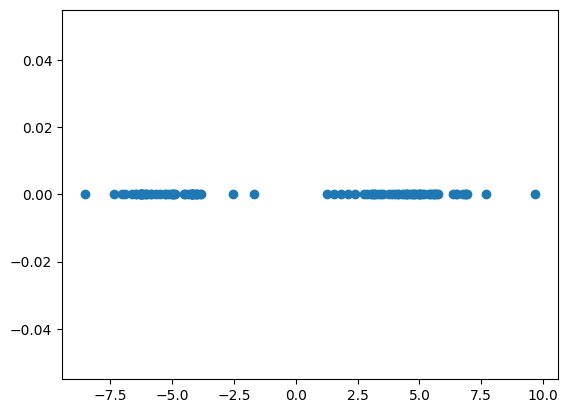

In [15]:
# Implement Oja's rule here extending your previous implementation
# of the simple Hebb rule. Note that this question on Oja's rule
# uses a different dataset. So, don't forget to change the dataset
# after you have copied the code to this block.

import numpy as np

# load data from the text file
data = np.loadtxt('data_two_groups.txt', usecols=range(5))
print(data[1:5,:])

# we need a vector of 5 parameters
w = np.random.normal(0, 0.5, 5)

print("initial weights")
print(w)

# learning rate; don't change the learning rate epsilon when you are working on questions 2 and 3, unless you really know what you are doing. You may want to make the learning rate dependent on the epoch number to converge to a stable solution.
epsilon = 0.01

num_iterations = 6

update = 0
# we can do a fixed number of iterations because the simple Hebb rule won't converge
for i in range(num_iterations):
    for x in data:

        # TODO: add your code here; note that "epsilon"
        # is defined above and it should be used here;
        # don't change its default value in this question.

        y = np.dot(x,w)
        delta_w = epsilon*(x*y-y*y*w)

        w = w+delta_w
        
        update = update + 1
        if update % 10 == 0:
            # print every 10th update
            print("\tCurrent input: " + str(x))
            # print the weights for every x to see how they are evolving
            print("New Weights:\n" + str(w))

# the final weights
print(w)


# do PCA and show the data in 1D
plt.figure(2)
pca = PCA(n_components=1)
# fit the model parameters
pca.fit(data)
print("all principal components:")
print(pca.components_)
# project the data to the new dimension
data_pca = pca.transform(data)
# a vector of zeros for the scatter plot
yaxis = np.zeros(data_pca.shape[0])
plt.scatter(data_pca[:,0], yaxis)
plt.show() 


- **(3-5):** Run your implementation of Oja's rule on `data_two_groups.txt`. Use the vector of parameters $w$ that you will obtain using Oja's rule to project the original five-dimensional data into 1 dimension defined by $w$. The image that you will obtain should be similar to the one produced by PCA in `sklearn` above. The images may be identical if you have run Oja's rule until convergence, but this is not guaranteed. This step will allow you to see very clearly how a low dimensional representation (and hence data compression) can be achieved using Hebbian learning/Oja's rule or PCA.

- **(3-6):** The vector $w$ that you will learn for the given data using Oja's rule will have a very specific relationship between the weights of feature $X_5$ and features $X_3$ and $X_4$. Use Fig. 1 to explain/justify this relationship.

- **(3-7):** Add a stopping condition to your Oja's rule implementation. The algorithm should stop when $\Delta w$ is sufficiently small (e.g. $0.01$ or lower) across all features $X_i$.

## Question 4 - Learning Rate

In this question, you will use your implementation of Oja's rule developed in Question 3. Your implementation has the learning rate parameter that is denoted $\epsilon$ in our lecture slides and in the textbook.

The objective of this exploration is to investigate the impact of the learning rate on the learning process and its convergence. The following questions should be addressed.

- **(4-1):** How does the change in the learning rate affect the general character of the weight updates?
- **(4-2):** Explain why this happens.
- **(4-3):** Explain the relevance (if any) this might have for the importance of integrating over multiple experiences (events) in learning.

## References

O'Reilly, Randall C., and Yuko Munakata. Computational explorations in cognitive neuroscience: Understanding the mind by simulating the brain. MIT press, 2000.